### Dataset
Lets Load the dataset. We shall use the following datasets:

Features are in: "sido0_train.mat"

Labels are in: "sido0_train.targets"

In [1]:
from scipy.io import loadmat
import numpy as np

X = loadmat(r"sido0_matlab/sido0_train.mat")
y = np.loadtxt(r"sido0_matlab/sido0_train.targets")

# Statistics of the Dense Format of X
X = X['X'].todense()
print(X.shape)

(12678, 4932)


### Logistic Regression Definition
Lets use the Logistic Regression definition we previously used


In [18]:
def LogisticLoss(w, X, y, lam):
    # Computes the cost function for all the training samples
    m = X.shape[0]
    Xw = np.dot(X,w)
    yT = y.reshape(-1,1)
    yXw = np.multiply(yT,Xw)
    f = np.sum(np.logaddexp(0,-yXw)) + 0.5*lam*np.sum(np.multiply(w,w))
    gMul = 1/(1 + np.exp(yXw))
    ymul = -1*np.multiply(yT, gMul)
    g =  np.dot(ymul.reshape(1,-1),X) + lam*w.reshape(1,-1)
    g = g.reshape(-1,1)
    return [f, g]

def HingeLoss(w, X, y, lam):
    # Computes the cost function for all the training samples
    Xw = np.matmul(X,w)
    yT = y.reshape(-1,1)
    yXw = np.multiply(yT,Xw)
    f = np.sum(np.maximum(0, 1 - yXw.T)) + 0.5*np.sum(np.multiply(w,w))
    ymul = -1*np.multiply(yT,np.double(1 > yXw))    
    g = np.matmul(ymul.reshape(1,-1),X).reshape(-1,1)  + 1*w.reshape(-1,1)
    return [f, g]

### Gradient Descent
Lets now define the most basic version of Gradient Descent and tune the learning rate!

In [38]:
from numpy import linalg as LA

def gd(funObj,w,maxEvals,alpha,X,y,lam, verbosity, freq):
    [f,g] = funObj(w,X,y,lam)
    funEvals = 1
    funVals = []
    while(1):
        [f,g] = funObj(w,X,y,lam)
        optCond = LA.norm(g, np.inf)
        if ((verbosity > 0) and (funEvals % freq == 0)):
            print(funEvals,alpha,f,optCond)
        w = w - alpha*g
        funEvals = funEvals+1
        if (optCond < 1e-2):
            break
        if (funEvals > maxEvals):
            break
        funVals.append(f)
    return funVals

def gdLinRed(funObj,w,maxEvals,alpha,X,y,lam, verbosity, freq):
    [f,g] = funObj(w,X,y,lam)
    funEvals = 1
    funVals = []
    while(1):
        [f,g] = funObj(w,X,y,lam)
        optCond = LA.norm(g, np.inf)
        if ((verbosity > 0) and (funEvals % freq == 0)):
            print(funEvals,alphaCurr,f,optCond)
        alphaCurr = alpha/(1 + funEvals)
        w = w - alphaCurr*g
        funEvals = funEvals+1
        if (optCond < 1e-2):
            break
        if (funEvals > maxEvals):
            break
        funVals.append(f)
    return funVals

[nSamples,nVars] = X.shape
w = np.zeros((nVars,1))

### Lets run it!
Now let us run it for alpha = 0.1

In [20]:
funV = gd(HingeLoss,w,200,1e-1,X,y,1,1,10)

10 0.1 11081430.216650046 449.7090942869999
20 0.1 15151729.399525635 630.0306803579006
30 0.1 7555920.214349102 553.0018080323345
40 0.1 38552020.67535276 876.9416237421942
50 0.1 2052387.1431931367 153.85400290151262
60 0.1 43949742.89940409 859.7325051168436
70 0.1 2529174.923226729 1149.8106795278043
80 0.1 15654176.864465766 601.8215019788339
90 0.1 1704567.6486949527 419.2249936786189
100 0.1 12041483.006587211 523.7640551099435
110 0.1 13371906.217746304 621.6613697515515
120 0.1 8176441.420134161 1682.8503981140384
130 0.1 8208039.339663002 552.8612996781367
140 0.1 7773375.523865128 591.1089961144314
150 0.1 16433135.472827531 595.5870421462569
160 0.1 32541631.60821715 882.8960377593298
170 0.1 4653605.142299113 557.2451278063938
180 0.1 582181.9214030121 214.54349372148812
190 0.1 38121321.79078288 792.6282587212445
200 0.1 7398339.852883474 541.5915398301028


### Learning Rate is too large!
Lets try alpha = 1e-3

In [25]:
funV = gd(HingeLoss,w,200,1e-3,X,y,1,1,10)

10 0.001 355587.39778875076 460.07577570515014
20 0.001 69326.64777147173 95.53320209721444
30 0.001 56156.572903245295 274.74392008198674
40 0.001 47313.147978875175 331.36462437921085
50 0.001 39365.074324166075 323.0080742392985
60 0.001 33229.86120211198 295.68492612865964
70 0.001 33034.67104974243 563.4317434249481
80 0.001 53489.13529767374 414.5880276348508
90 0.001 23313.72025036299 379.87314616687405
100 0.001 19346.753964849846 186.6547260854177
110 0.001 17551.75115706438 197.36615930706017
120 0.001 34150.924795420906 369.30583976790024
130 0.001 12011.749357864688 168.40865352892888
140 0.001 47427.947761316056 443.90985484087815
150 0.001 16529.582718681522 709.0744782568646
160 0.001 14049.20490350971 624.8891680339799
170 0.001 11325.316701736836 468.7272475723256
180 0.001 8626.853501177908 308.5498123963688
190 0.001 8770.070635536722 363.4048329177277
200 0.001 13264.590717277057 286.9621743218164


#### Still diverging a little. Lets reduce it further!

In [26]:
funV = gd(HingeLoss,w,200,1e-5,X,y,1,1,10)

10 1e-05 4001.097768276672 452.0815618475043
20 1e-05 1366.297854913873 114.93464308419857
30 1e-05 1181.5456698355072 176.03109274912703
40 1e-05 1083.9936919317488 311.026449950983
50 1e-05 1002.4064085771486 326.0220176452961
60 1e-05 937.1806934183722 317.0254136425789
70 1e-05 887.9812809677371 300.00811139794996
80 1e-05 845.6996075872528 279.0055708410381
90 1e-05 822.8618296850332 359.00338052327083
100 1e-05 775.2344154871388 238.01638654566491
110 1e-05 731.8448887247665 109.02160432505585
120 1e-05 735.8579872061902 222.04410237532318
130 1e-05 694.6207955221581 150.00684558474606
140 1e-05 694.6162010401406 281.0052551118116
150 1e-05 660.4361263265093 107.01660026053987
160 1e-05 691.4332943193691 435.001904696942
170 1e-05 636.2241861049883 84.99936479327039
180 1e-05 737.2332022197469 652.9614528188956
190 1e-05 620.2969886459373 167.9962154617624
200 1e-05 602.3522522695534 45.04248070250282


#### Lets reduce it even lower!

In [28]:
funV = gd(HingeLoss,w,200,1e-7,X,y,1,1,10)

10 1e-07 1098.9154640030602 1500.993098203401
20 1e-07 1031.469451599212 532.9922230107763
30 1e-07 1008.4179692028557 378.9917665187708
40 1e-07 992.7039200850411 298.99142592716424
50 1e-07 981.6551811553716 247.99216523212672
60 1e-07 973.8391206542256 225.99192194007227
70 1e-07 967.7594396308126 227.99169624825203
80 1e-07 962.5723210222791 224.99147405665585
90 1e-07 958.1058131336175 207.9912584652803
100 1e-07 954.1142489005043 193.99105597411426
110 1e-07 950.3798915280574 190.9908644831449
120 1e-07 946.867327840501 190.99067399236603
130 1e-07 943.5981598384309 185.99048520177746
140 1e-07 940.6106774712937 173.99030491137435
150 1e-07 937.8432148314799 170.99013222114743
160 1e-07 935.2103228885861 164.98996563109083
170 1e-07 932.7186689629197 163.98980154119948
180 1e-07 930.3777314483937 157.98964195147036
190 1e-07 928.2319097791055 148.9894895618976
200 1e-07 926.2213786041191 148.98934107247493


#### Lets now run GD with reducing learning rate!

In [39]:
funV = gdLinRed(HingeLoss,w,200,2,X,y,1,1,10)

10 0.2 32245377.447160497 761.4444444444445
20 0.1 21221626.639986154 641.2421052631579
30 0.06666666666666667 13461987.527152862 621.2137931034482
40 0.05 1131515.504746055 312.0051282051282
50 0.04 3599777.3094393965 507.51673469387754
60 0.03333333333333333 677433.8785471943 780.9644067796611
70 0.02857142857142857 594692.1298892801 792.9192546583851
80 0.025 1911751.828772532 483.44398734177213
90 0.022222222222222223 2073997.9076215914 483.16629213483145
100 0.02 2037300.6913947961 482.91959595959594
110 0.01818181818181818 317219.1214046166 898.8824020016681
120 0.016666666666666666 810213.3268168628 1716.6711484593839
130 0.015384615384615385 2259476.333305492 481.053786523554
140 0.014285714285714285 167913.96511001026 207.5596094552929
150 0.013333333333333334 642321.0162092161 446.33691275167786
160 0.0125 190996.22375153864 713.2134433962264
170 0.011764705882352941 183859.27781249591 562.8630699617125
180 0.011111111111111112 574771.7290551577 452.12607076350093
190 0.01052

In [35]:
funV = gdLinRed(HingeLoss,w,200,1e-2,X,y,1,1,10)

10 0.0011111111111111111 7851405.047802182 559.3893977832765
20 0.0005263157894736842 7320625.151370776 555.381584722673
30 0.0003448275862068966 7018463.744998654 553.0870521359082
40 0.0002564102564102564 6806894.259712851 551.474767748735
50 0.00020408163265306123 6644177.951273229 550.2315594929117
60 0.00016949152542372882 6512049.132153587 549.2199797864713
70 0.00014492753623188405 6400874.176136425 548.3673774533308
80 0.00012658227848101267 6304949.446919412 547.6306625579989
90 0.00011235955056179776 6220619.084772194 546.9821743628672
100 0.00010101010101010101 6145399.5476547405 546.4030976729175
110 9.174311926605505e-05 6077526.909238482 545.88005377047
120 8.403361344537815e-05 6015703.447607201 545.4031898355789
130 7.751937984496124e-05 5958946.748186374 544.9650400642948
140 7.194244604316547e-05 5906495.277518248 544.5598123172863
150 6.711409395973155e-05 5857746.833941903 544.1829227372882
160 6.289308176100629e-05 5812217.0340104345 543.8306816098549
170 5.9171597

In [40]:
funV = gdLinRed(HingeLoss,w,200,1e-4,X,y,1,1,10)

10 1e-05 33290.15355275317 452.5239804610305
20 5e-06 29363.80677521616 452.4937178582692
30 3.3333333333333333e-06 27031.82487985571 452.4757429804942
40 2.5e-06 25367.366616204876 452.4629129270702
50 2e-06 24072.156249112057 452.45292887549033
60 1.6666666666666667e-06 23011.75834632785 452.44475469771027
70 1.4285714285714286e-06 22113.96580269146 452.4378338633098
80 1.25e-06 21335.480485941935 452.43183264962295
90 1.1111111111111112e-06 20648.283107835887 452.4265350933068
100 1e-06 20033.195396364645 452.4217933727368
110 9.090909090909091e-07 19476.512119358453 452.4175018500018
120 8.333333333333333e-07 18968.098320613382 452.41358240556053
130 7.692307692307693e-07 18500.247720010913 452.4099756393929
140 7.142857142857143e-07 18066.963809745142 452.40663533001805
150 6.666666666666667e-07 17663.488716913147 452.4035248031515
160 6.25e-07 17285.983938483063 452.40061447091495
170 5.882352941176471e-07 16931.307742734087 452.3978801161077
180 5.555555555555556e-07 16596.85611

#### Lets plot the results for different alpha

In [28]:
[nSamples,nVars] = X.shape
w = np.zeros((nVars,1))
funV1 = gd(LogisticLoss,w,200,1e-4,X,y,1,0,0)
funV2 = gd(LogisticLoss,w,200,1e-5,X,y,1,0,0)
funV3 = gd(LogisticLoss,w,200,1e-6,X,y,1,0,0)
funV4 = gd(LogisticLoss,w,200,1e-7,X,y,1,0,0)

Text(0, 0.5, 'Function Value')

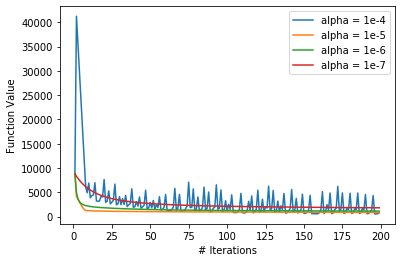

In [29]:
from matplotlib import pyplot as plt
plt.plot(range(1,len(funV1)+1), funV1, label='alpha = 1e-4')
plt.plot(range(1,len(funV2)+1), funV2, label='alpha = 1e-5')
plt.plot(range(1,len(funV3)+1), funV3, label='alpha = 1e-6')
plt.plot(range(1,len(funV4)+1), funV4, label='alpha = 1e-7')
plt.legend()
plt.xlabel("# Iterations")
plt.ylabel("Function Value")

Text(0, 0.5, 'Function Value')

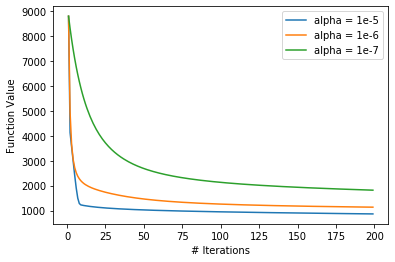

In [30]:
from matplotlib import pyplot as plt
plt.plot(range(1,len(funV2)+1), funV2, label='alpha = 1e-5')
plt.plot(range(1,len(funV3)+1), funV3, label='alpha = 1e-6')
plt.plot(range(1,len(funV4)+1), funV4, label='alpha = 1e-7')
plt.legend()
plt.xlabel("# Iterations")
plt.ylabel("Function Value")